In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("Walmart Sales.xlsx")

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [5]:
data.shape

(1000, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [7]:
data.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [10]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3


In [11]:
# A.Visualizing the performance of sales and revenue at the city and branch level:
city_branch_performance = data.groupby(['City', 'Branch']).agg({'Quantity': 'sum', 'Unit price': 'sum'}).reset_index()

In [12]:
city_branch_performance

,City,Branch,Quantity,Unit price
0,Mandalay,A,637,6349.11
1,Mandalay,B,664,6623.73
2,Mandalay,C,519,5506.04
3,Naypyitaw,A,648,5953.55
4,Naypyitaw,B,604,6298.64
5,Naypyitaw,C,579,6315.57
6,Yangon,A,598,6342.88
7,Yangon,B,631,6329.25
8,Yangon,C,630,5953.36


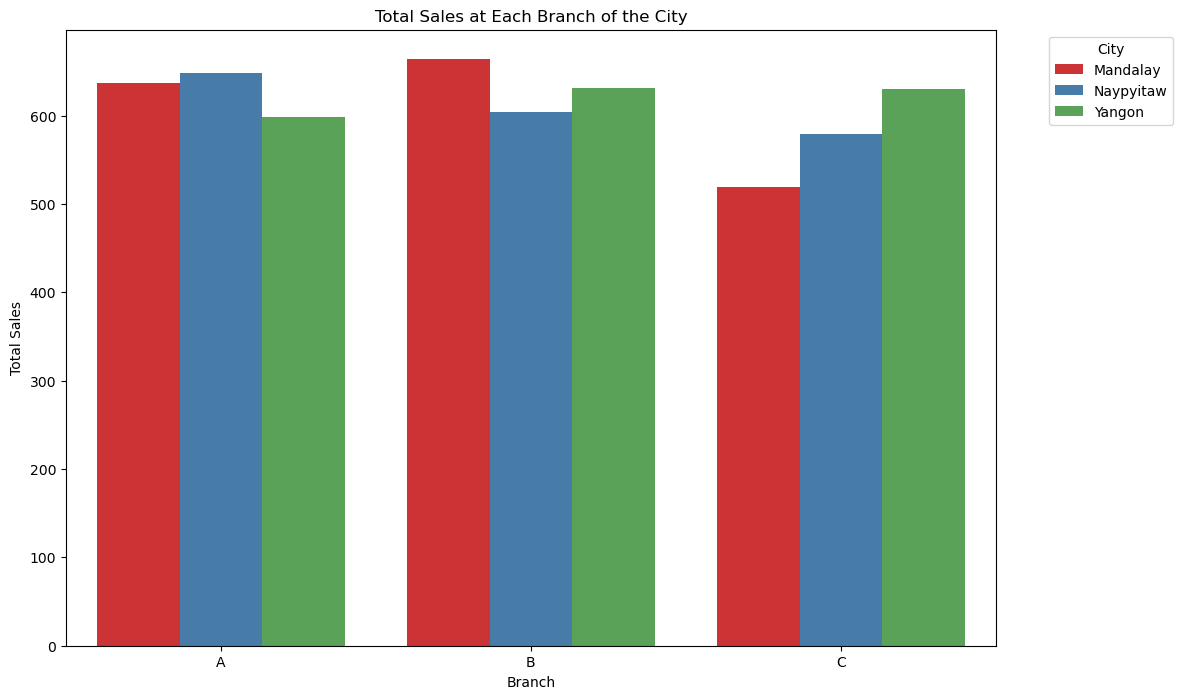

In [13]:
# Visualizing total sales at each branch in each city using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Branch', y='Quantity', hue='City', data=city_branch_performance,palette='Set1')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.title('Total Sales at Each Branch of the City')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
#B.What is the average price of an item sold at each branch of the city:
average_price_per_branch = data.groupby(['City', 'Branch']).agg({'Unit price': 'mean'}).reset_index()

In [21]:
average_price_per_branch

,City,Branch,Unit price
0,Mandalay,A,53.353866
1,Mandalay,B,56.133305
2,Mandalay,C,57.958316
3,Naypyitaw,A,54.123182
4,Naypyitaw,B,57.785688
5,Naypyitaw,C,57.941009
6,Yangon,A,55.639298
7,Yangon,B,56.011062
8,Yangon,C,52.684602


In [22]:
average_price_per_branch.columns

Index(['City', 'Branch', 'Unit price'], dtype='object')

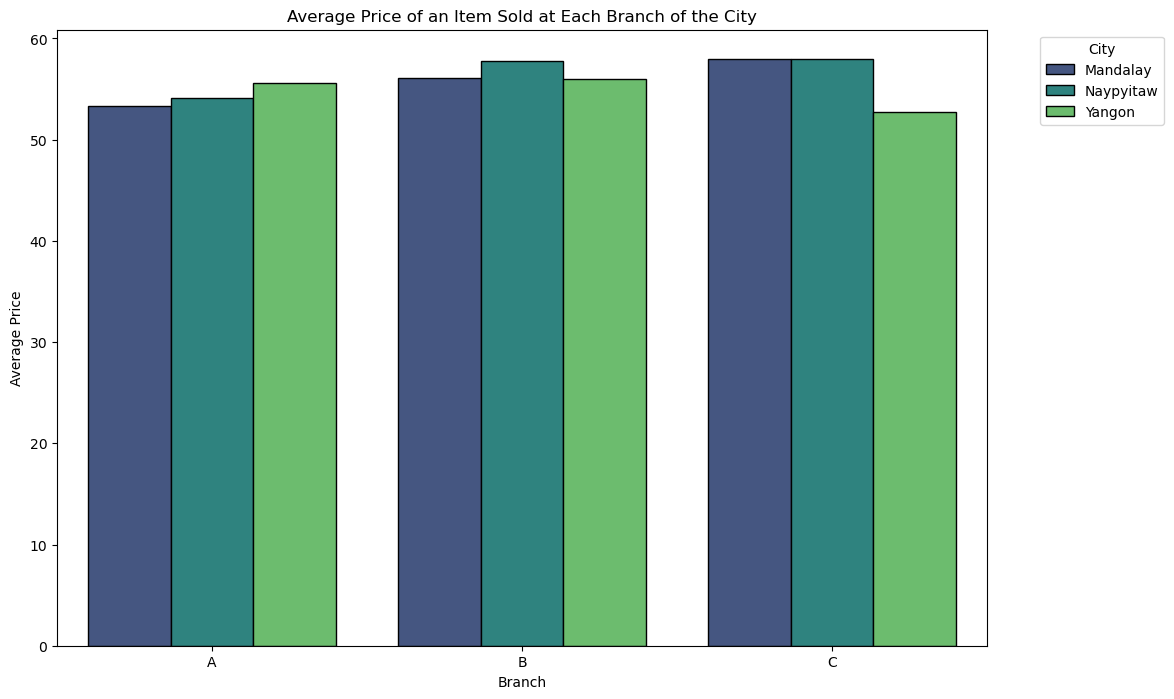

In [24]:
# Visualizing average price at each branch in each city using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Branch', y='Unit price', hue='City', data=average_price_per_branch,palette='viridis', edgecolor='black', dodge=True)
plt.xlabel('Branch')
plt.ylabel('Average Price')
plt.title('Average Price of an Item Sold at Each Branch of the City')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [25]:
#C.Analyze the performance of sales and revenue Month over Month across Product line, Gender, and Payment Method:

In [97]:
monthly_data = data.groupby(['Product line', 'Gender', 'Payment']).agg({
    'Quantity': 'sum',
    'Unit price': 'mean',
    'Rating': 'mean'
}).reset_index()

In [98]:
# Calculate total sales for each category
monthly_data['Total Sales'] = monthly_data['Quantity'] * monthly_data['Unit price']

In [99]:
# Pivot the data for easy visualization
pivot_data = monthly_data.pivot_table(values='Total Sales', index=['Product line', 'Gender'],
                                      columns='Payment', aggfunc='sum').reset_index()

In [100]:
pivot_data

Payment,Product line,Gender,Cash,Credit card,Ewallet
0,Electronic accessories,Female,11341.438421,7725.707308,6198.531500
1,Electronic accessories,Male,9324.916364,6227.260500,10931.087879
2,Fashion accessories,Female,9356.971429,9245.644242,10860.328571
3,Fashion accessories,Male,7639.200000,7122.052174,7178.864000
4,Food and beverages,Female,11660.926364,9673.194194,9549.046154
5,Food and beverages,Male,6375.226667,8613.389333,7536.618000
6,Health and beauty,Female,6202.636364,5279.218421,5984.257391
7,Health and beauty,Male,9478.029259,9941.054516,9906.808333
8,Home and lifestyle,Female,8783.188750,9045.323077,10599.065172
9,Home and lifestyle,Male,8819.553333,3896.668421,9463.372286


In [101]:
# Identify focus areas based on the total sales for March and April
focus_areas = pivot_data[['Product line', 'Gender', 'Ewallet', 'Cash']].copy()
focus_areas['MoM Growth'] = (focus_areas['Cash'] - focus_areas['Ewallet']) / focus_areas['Ewallet'] * 100

In [102]:
# Display focus areas with the highest MoM growth
top_focus_areas = focus_areas.sort_values(by='MoM Growth', ascending=False).head(5)
top_focus_areas

Payment,Product line,Gender,Ewallet,Cash,MoM Growth
0,Electronic accessories,Female,6198.531500,11341.438421,82.969763
4,Food and beverages,Female,9549.046154,11660.926364,22.116138
11,Sports and travel,Male,7761.193704,8418.818462,8.473242
3,Fashion accessories,Male,7178.864000,7639.200000,6.412379
6,Health and beauty,Female,5984.257391,6202.636364,3.649224


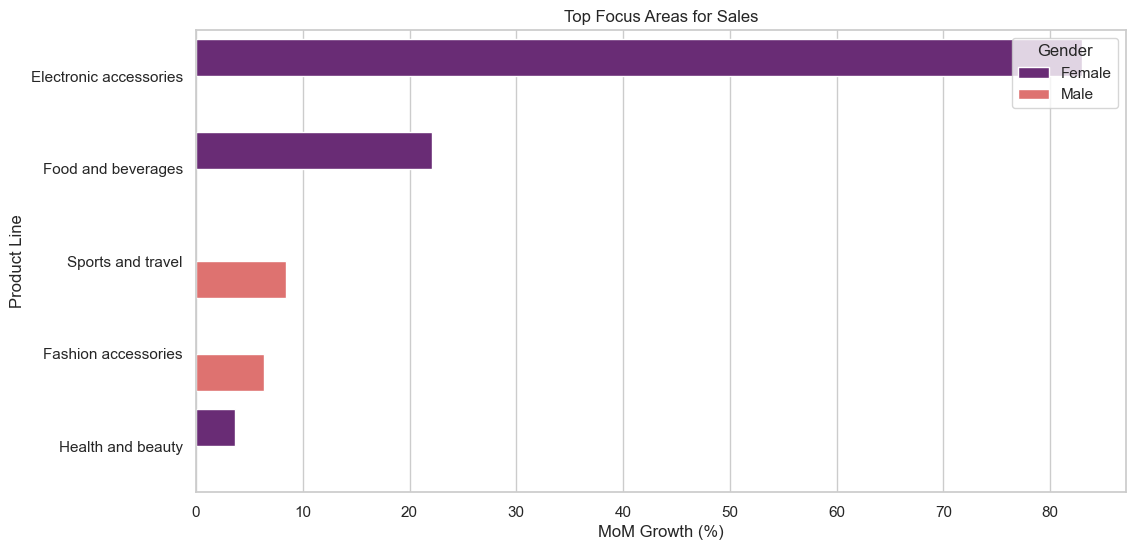

In [107]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='MoM Growth', y='Product line', hue='Gender', data=top_focus_areas, palette= 'magma')
bar_plot.set(xlabel='MoM Growth (%)', ylabel='Product Line', title='Top Focus Areas for Sales')
plt.legend(title='Gender', loc='upper right')
plt.show()